# I'm still not sure if Palmer Penguins is okay

So just like in the Perceptron module, I'm not sure if it's okay to implement linear regression on the Palmer Penguins module, so I'm just doing another application of linear regression on the mushrooms dataset.

[The Mushrooms Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) contains samples from 23 species of gilled mushrooms, in which mushrooms are classified to be edible or poisonous. The other key features are defined here:

1) cap_diameter
2) cap-shape
3) gill-attachment 
4) gill_color
5) stem_height
6) stem_width
7) stem-color
8) season
9) class

For this linear regression task, we will be using stem width to predict cap diameter for edible mushrooms.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

sns.set_theme()

url = r"C:\Users\faith\new577\INDE577\577repo\Supervised Learning\Datasets\mushroom_cleaned.csv"
df = pd.read_csv(url)

#make the data sets and split into testing and training
df_edible = df[df['class'] == 0]
X = df_edible[['stem_width']]
y = df_edible['cap_diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#train the data and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [19]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

#testing accuracy score
print(f"Training R^2 score: {train_score:.2f}")
print(f"Test R^2 score: {test_score:.2f}")

Training R^2 score: 0.64
Test R^2 score: 0.63


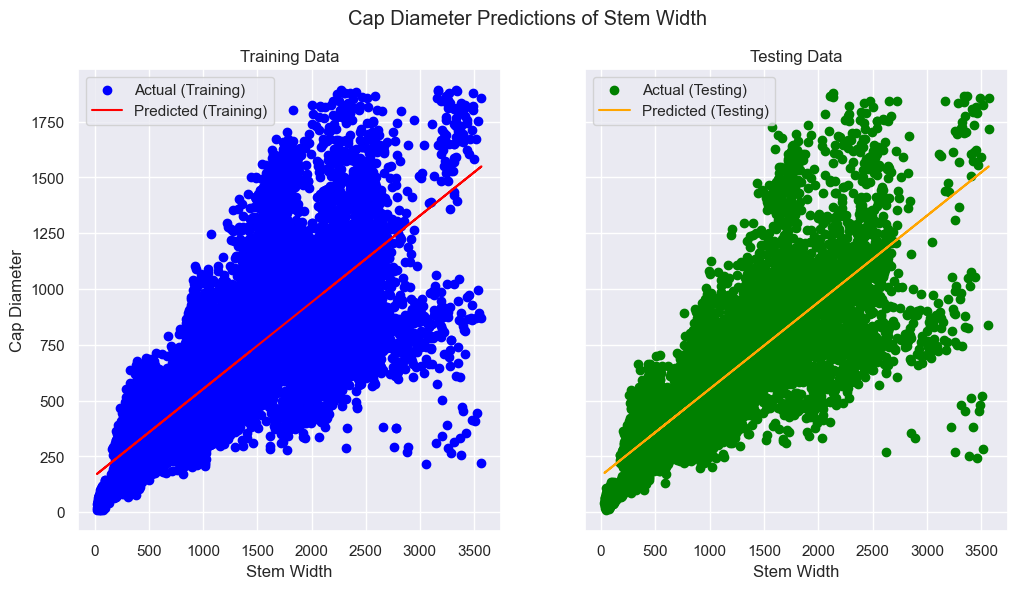

In [20]:
#plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].scatter(X_train, y_train, color='blue', label='Actual (Training)')
axes[0].plot(X_train, y_pred_train, color='red', label='Predicted (Training)')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Stem Width')
axes[0].set_ylabel('Cap Diameter')
axes[0].legend()

axes[1].scatter(X_test, y_test, color='green', label='Actual (Testing)')
axes[1].plot(X_test, y_pred_test, color='orange', label='Predicted (Testing)')
axes[1].set_title('Testing Data')
axes[1].set_xlabel('Stem Width')
axes[1].legend()

plt.suptitle('Cap Diameter Predictions of Stem Width')
plt.show()


Not bad! There's definitely at least somewhat of a linear relationship between cap stem width and cap diameter, so 64% accuracy is not bad at all.